In [73]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


# Data preprocesing - EDA - visualization

In [2]:
df = pd.read_csv('ICUfinal.csv')

In [3]:
df.head()

,Unnamed: 0,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,...,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,tags,ICU
0,0,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,"Motor Neurone Disease, Smoker",0
1,1,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,"Motor Neurone Disease, Smoker",0
2,2,0,1,60th,0,0.0,0.0,1.0,0.605263,0.605263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,"Motor Neurone Disease, Smoker",0
3,3,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,...,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,"Motor Neurone Disease, Smoker",0
4,4,0,1,60th,0,0.0,0.0,1.0,0.000000,0.000000,...,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,"Motor Neurone Disease, Smoker",1


In [4]:
df.insert(len(df.columns), 'DISEASE GROUP 1', 0)
df.insert(len(df.columns), 'DISEASE GROUP 2', 0)
df.insert(len(df.columns), 'DISEASE GROUP 3', 0)
df.insert(len(df.columns), 'DISEASE GROUP 4', 0)
df.insert(len(df.columns), 'DISEASE GROUP 5', 0)
df.insert(len(df.columns), 'DISEASE GROUP 6', 0)

In [5]:
for row in range(len(df.index)):
    tags = str(df['tags'][row]).split(',')
    for disease in tags:
        if disease == 'Lung cancer':
            df['DISEASE GROUP 1'][row] = 1
        if disease == 'heart disease':
            df['DISEASE GROUP 2'][row] = 1
        if disease == 'asthma':
            df['DISEASE GROUP 3'][row] = 1
        if disease == 'Kidney disease':
            df['DISEASE GROUP 4'][row] = 1
        if disease == 'Motor Neurone Disease':
            df['DISEASE GROUP 5'][row] = 1
        if disease == 'Smoker':
            df['DISEASE GROUP 6'][row] = 1

D:\software\installs\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
D:\software\installs\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\software\installs\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\software\installs\lib\site-packages\ipykernel_launcher.py:

In [6]:
del df['tags']
df.head()

,Unnamed: 0,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,...,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,DISEASE GROUP 1,DISEASE GROUP 2,DISEASE GROUP 3,DISEASE GROUP 4,DISEASE GROUP 5,DISEASE GROUP 6
0,0,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,...,-1.000000,-1.000000,0-2,0,0,0,0,0,1,0
1,1,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,...,-1.000000,-1.000000,2-4,0,0,0,0,0,1,0
2,2,0,1,60th,0,0.0,0.0,1.0,0.605263,0.605263,...,NaN,NaN,4-6,0,0,0,0,0,1,0
3,3,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,...,-1.000000,-1.000000,6-12,0,0,0,0,0,1,0
4,4,0,1,60th,0,0.0,0.0,1.0,0.000000,0.000000,...,-0.242282,-0.814433,ABOVE_12,1,0,0,0,0,1,0


#### Null / NA values in our dataset

In [7]:
def print_na(df):
    for i in range(df.isna().sum().shape[0]):
        f = df.isna().sum().index[i]
        v = df.isna().sum()[i]
        print(f, " : ", v)
print_na(df)

Unnamed: 0  :  0
PATIENT_VISIT_IDENTIFIER  :  0
AGE_ABOVE65  :  0
AGE_PERCENTIL  :  0
GENDER  :  0
HTN  :  5
IMMUNOCOMPROMISED  :  5
OTHER  :  5
ALBUMIN_MEDIAN  :  1104
ALBUMIN_MEAN  :  1104
ALBUMIN_MIN  :  1104
ALBUMIN_MAX  :  1104
ALBUMIN_DIFF  :  1104
BE_ARTERIAL_MEDIAN  :  1104
BE_ARTERIAL_MEAN  :  1104
BE_ARTERIAL_MIN  :  1104
BE_ARTERIAL_MAX  :  1104
BE_ARTERIAL_DIFF  :  1104
BE_VENOUS_MEDIAN  :  1104
BE_VENOUS_MEAN  :  1104
BE_VENOUS_MIN  :  1104
BE_VENOUS_MAX  :  1104
BE_VENOUS_DIFF  :  1104
BIC_ARTERIAL_MEDIAN  :  1104
BIC_ARTERIAL_MEAN  :  1104
BIC_ARTERIAL_MIN  :  1104
BIC_ARTERIAL_MAX  :  1104
BIC_ARTERIAL_DIFF  :  1104
BIC_VENOUS_MEDIAN  :  1104
BIC_VENOUS_MEAN  :  1104
BIC_VENOUS_MIN  :  1104
BIC_VENOUS_MAX  :  1104
BIC_VENOUS_DIFF  :  1104
BILLIRUBIN_MEDIAN  :  1104
BILLIRUBIN_MEAN  :  1104
BILLIRUBIN_MIN  :  1104
BILLIRUBIN_MAX  :  1104
BILLIRUBIN_DIFF  :  1104
BLAST_MEDIAN  :  1104
BLAST_MEAN  :  1104
BLAST_MIN  :  1104
BLAST_MAX  :  1104
BLAST_DIFF  :  1104
CALCIUM_ME

#### check for duplicate columns i.e columns having all values exactly equal
#### The first instance of a column is marked as 'False', when the value is seen to be repeated in other
#### column(s) it is marked as 'True'
#### 143 duplicate columns

In [8]:

duplicated = df.T.duplicated()
count = 0

for i in range(len(duplicated)):
    if duplicated[i] == True:
        print(duplicated.index[i], ":", duplicated[i])
        count += 1

print("total duplicate columns = ", count)

ALBUMIN_MEAN : True
ALBUMIN_MIN : True
ALBUMIN_MAX : True
BE_ARTERIAL_MEAN : True
BE_ARTERIAL_MIN : True
BE_ARTERIAL_MAX : True
BE_ARTERIAL_DIFF : True
BE_VENOUS_MEAN : True
BE_VENOUS_MIN : True
BE_VENOUS_MAX : True
BE_VENOUS_DIFF : True
BIC_ARTERIAL_MEAN : True
BIC_ARTERIAL_MIN : True
BIC_ARTERIAL_MAX : True
BIC_ARTERIAL_DIFF : True
BIC_VENOUS_MEAN : True
BIC_VENOUS_MIN : True
BIC_VENOUS_MAX : True
BIC_VENOUS_DIFF : True
BILLIRUBIN_MEAN : True
BILLIRUBIN_MIN : True
BILLIRUBIN_MAX : True
BILLIRUBIN_DIFF : True
BLAST_MEAN : True
BLAST_MIN : True
BLAST_MAX : True
BLAST_DIFF : True
CALCIUM_MEAN : True
CALCIUM_MIN : True
CALCIUM_MAX : True
CALCIUM_DIFF : True
CREATININ_MEAN : True
CREATININ_MIN : True
CREATININ_MAX : True
CREATININ_DIFF : True
FFA_MEAN : True
FFA_MIN : True
FFA_MAX : True
FFA_DIFF : True
GGT_MEAN : True
GGT_MIN : True
GGT_MAX : True
GGT_DIFF : True
GLUCOSE_MEAN : True
GLUCOSE_MIN : True
GLUCOSE_MAX : True
GLUCOSE_DIFF : True
HEMATOCRITE_MEAN : True
HEMATOCRITE_MIN : True
H

#### Eliminate duplicate columns - it drops the columns marked as 'True' from the previous step
#### In this way we still retain one copy of the values for analysis (the one that is marked as 'False')
### check the shape here : 231 - 143 = 88


In [9]:
df = df.T.drop_duplicates().T
df.shape

(1925, 89)

In [10]:
def generate_icu_feature(p_id):
    temp_df = df[df['PATIENT_VISIT_IDENTIFIER']==p_id]
    icu_track = temp_df['ICU']
    icu = False
    for t in icu_track:
        icu = icu or t
    return icu

df['ICU'] = df.apply(lambda x : generate_icu_feature(x['PATIENT_VISIT_IDENTIFIER']), axis = 1)

#### all unique ids
#### Iterate for each unique patient id
#### create a temporary dataframe to hold details for each patient
#### Fill missing data with mean of values
#### Concatenate dataframes from NA_filled_first_window to assemble the final dataframe

In [11]:
patient_id = df['PATIENT_VISIT_IDENTIFIER'].unique()
NA_filled_first_window = []

for p_id in patient_id:
    temp = df[ df['PATIENT_VISIT_IDENTIFIER'] == p_id ]
    temp.fillna(temp.mean(),inplace=True)
    NA_filled_first_window.append(temp.iloc[[0]])

final_data = pd.concat(NA_filled_first_window)

D:\software\installs\lib\site-packages\pandas\core\series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


### check for any remaining NA

In [12]:
print_na(final_data)

Unnamed: 0  :  0
PATIENT_VISIT_IDENTIFIER  :  0
AGE_ABOVE65  :  0
AGE_PERCENTIL  :  0
GENDER  :  0
HTN  :  1
IMMUNOCOMPROMISED  :  1
OTHER  :  1
ALBUMIN_MEDIAN  :  2
ALBUMIN_DIFF  :  2
BE_ARTERIAL_MEDIAN  :  2
BE_VENOUS_MEDIAN  :  2
BIC_ARTERIAL_MEDIAN  :  2
BIC_VENOUS_MEDIAN  :  2
BILLIRUBIN_MEDIAN  :  2
BLAST_MEDIAN  :  2
CALCIUM_MEDIAN  :  2
CREATININ_MEDIAN  :  2
FFA_MEDIAN  :  2
GGT_MEDIAN  :  2
GLUCOSE_MEDIAN  :  2
HEMATOCRITE_MEDIAN  :  2
HEMOGLOBIN_MEDIAN  :  2
INR_MEDIAN  :  2
LACTATE_MEDIAN  :  2
LEUKOCYTES_MEDIAN  :  2
LINFOCITOS_MEDIAN  :  2
NEUTROPHILES_MEDIAN  :  2
P02_ARTERIAL_MEDIAN  :  2
P02_VENOUS_MEDIAN  :  2
PC02_ARTERIAL_MEDIAN  :  2
PC02_VENOUS_MEDIAN  :  2
PCR_MEDIAN  :  2
PH_ARTERIAL_MEDIAN  :  2
PH_VENOUS_MEDIAN  :  2
PLATELETS_MEDIAN  :  2
POTASSIUM_MEDIAN  :  2
SAT02_ARTERIAL_MEDIAN  :  2
SAT02_VENOUS_MEDIAN  :  2
SODIUM_MEDIAN  :  2
TGO_MEDIAN  :  2
TGP_MEDIAN  :  2
TTPA_MEDIAN  :  2
UREA_MEDIAN  :  2
DIMER_MEDIAN  :  2
BLOODPRESSURE_DIASTOLIC_MEAN  :  1
BLO

### Find the one with nan value

In [13]:
final_data[ final_data['DISEASE GROUP 1'].isna() ]

,Unnamed: 0,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_DIFF,...,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,DISEASE GROUP 1,DISEASE GROUP 2,DISEASE GROUP 3,DISEASE GROUP 4,DISEASE GROUP 5,DISEASE GROUP 6


#### the patient with ID = 199 has all values as NaN, hence drop this patient details
#### We still have one more row with more NaN values, Find the one with nan value for 'ALBUMIN_MEDIAN'

In [14]:
final_data = final_data[ final_data['PATIENT_VISIT_IDENTIFIER'] != 199 ]

In [15]:
final_data[ final_data['ALBUMIN_MEDIAN'].isna() ]

,Unnamed: 0,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_DIFF,...,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,DISEASE GROUP 1,DISEASE GROUP 2,DISEASE GROUP 3,DISEASE GROUP 4,DISEASE GROUP 5,DISEASE GROUP 6
1435,1435,287,0,10th,0,0.0,0.0,1.0,NaN,NaN,...,-1.0,-1.0,0-2,1,0,0,0,0,0,0


#### drop the patient with Id = 287
### Run the cell that displays NA values => now we don't have any NA values and we can start with data visualization now

In [16]:
final_data = final_data[ final_data['PATIENT_VISIT_IDENTIFIER'] != 287 ]

In [17]:
final_data.drop(columns = 'WINDOW',inplace=True)

In [18]:
col = final_data.columns[final_data.nunique() <= 1].tolist()
print(col)
final_data.drop(columns = col, inplace=True)

['ALBUMIN_DIFF']


### get the datatypes of all the columns

In [19]:
pd.set_option('display.max_rows', len(final_data.dtypes))
final_data.dtypes

Unnamed: 0                            int64
PATIENT_VISIT_IDENTIFIER              int64
AGE_ABOVE65                           int64
AGE_PERCENTIL                        object
GENDER                                int64
HTN                                 float64
IMMUNOCOMPROMISED                   float64
OTHER                               float64
ALBUMIN_MEDIAN                      float64
BE_ARTERIAL_MEDIAN                  float64
BE_VENOUS_MEDIAN                    float64
BIC_ARTERIAL_MEDIAN                 float64
BIC_VENOUS_MEDIAN                   float64
BILLIRUBIN_MEDIAN                   float64
BLAST_MEDIAN                        float64
CALCIUM_MEDIAN                      float64
CREATININ_MEDIAN                    float64
FFA_MEDIAN                          float64
GGT_MEDIAN                          float64
GLUCOSE_MEDIAN                      float64
HEMATOCRITE_MEDIAN                  float64
HEMOGLOBIN_MEDIAN                   float64
INR_MEDIAN                      

### AGE_ABOVE65
### People with age above 65 have a higher chance of needing an ICU

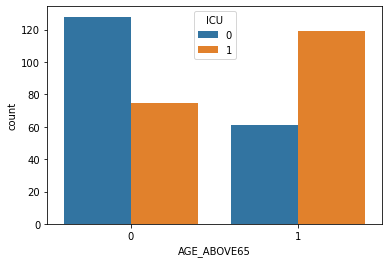

In [20]:
ax = sns.countplot(x="AGE_ABOVE65", hue="ICU", data=final_data)

## GENDER
#### Gender 0 is at a slightly higher risk if considered standalone
#### Although there may be other factors influencing the high icu count for it

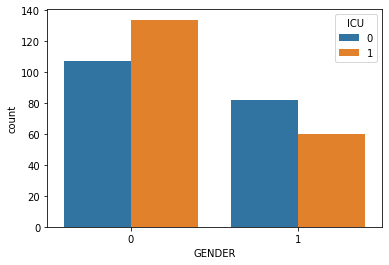

In [21]:
ax = sns.countplot(x="GENDER", hue="ICU", data=final_data)

### create a temporary dataframe

In [22]:
icu_count = [final_data[ final_data['ICU']==0 ].shape[0],  final_data[ final_data['ICU']==1 ].shape[0] ]

gender_count = [ final_data[ (final_data['ICU']==0) & (final_data['GENDER']==0)].shape[0],
                final_data[ (final_data['ICU']==1) & (final_data['GENDER']==0)].shape[0] ]

above65_count = [final_data[ (final_data['ICU']==0) & (final_data['AGE_ABOVE65']==1) ].shape[0],
                 final_data[ (final_data['ICU']==1) & (final_data['AGE_ABOVE65']==1) ].shape[0] ]

plot_df = pd.DataFrame(list(zip(icu_count, gender_count, above65_count)), columns =['icu_count', 'gender_count','above65_count'])

plot_df

,icu_count,gender_count,above65_count
0,189,107,61
1,194,134,119


#### 189 is the count of patients NOT admitted in the ICU
#### 194 is the count of patients admitted in the ICU

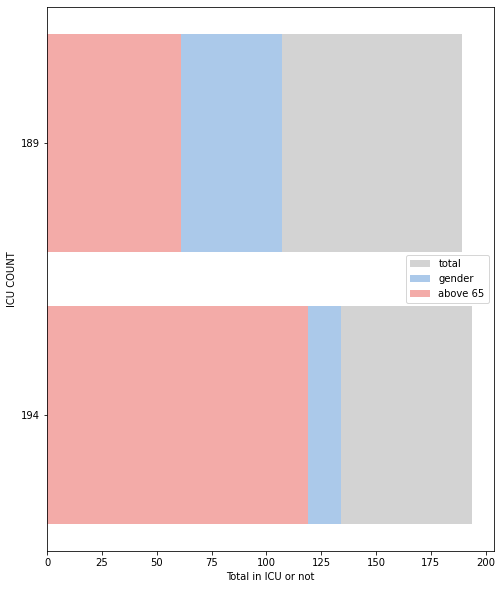

In [23]:
sns.set_color_codes("pastel")
fig = plt.subplots(figsize=(8,10))

ax = sns.barplot(x="icu_count", y="icu_count", data=plot_df, label="total", orient='h', color="lightgray")

sns.barplot(x="gender_count", y="icu_count", data=plot_df, label="gender", orient='h', color="b")

sns.barplot(x="above65_count", y="icu_count", data=plot_df, label="above 65" , orient='h', color="r")

ax.set(ylabel="ICU COUNT",xlabel="Total in ICU or not")
plt.legend()


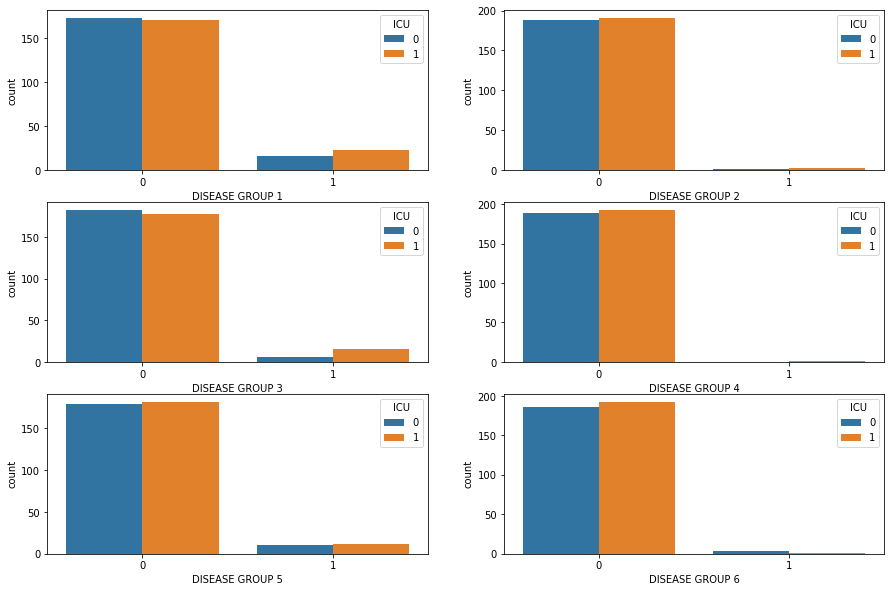

In [24]:
disease_grp = ['DISEASE GROUP 1','DISEASE GROUP 2','DISEASE GROUP 3',
               'DISEASE GROUP 4', 'DISEASE GROUP 5', 'DISEASE GROUP 6']

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(15,10))

col = 0

for i in range(len(disease_grp)):
    sns.countplot(x=disease_grp[i], hue="ICU", data=final_data, ax = axes[int((i)/2)][col])
    col = (col+1) % 2

#### For hypertension - people with hypertension have a slightly higher chance of needing the ICU
#### However, it cannot be claimed with certainity as there is high imbalance

<AxesSubplot:xlabel='HTN', ylabel='count'>

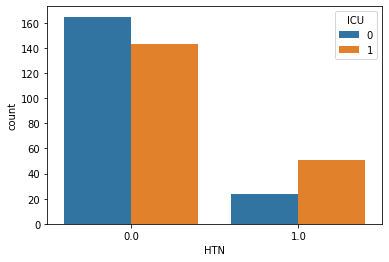

In [25]:
sns.countplot(x="HTN", hue="ICU", data=final_data)


#### Immunocompromised or non-immunocompromised does not make a significant difference, the distribution
#### looks similar for both, we cannot make any claims as the people with some immunocompromised conditions
#### are fewer than ones with such condition.

<AxesSubplot:xlabel='IMMUNOCOMPROMISED', ylabel='count'>

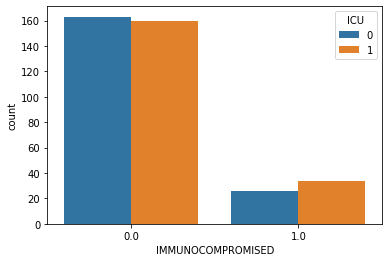

In [26]:
sns.countplot(x="IMMUNOCOMPROMISED", hue="ICU", data=final_data)


<AxesSubplot:xlabel='OTHER', ylabel='count'>

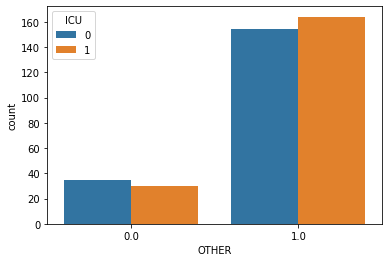

In [27]:
sns.countplot(x="OTHER", hue="ICU", data=final_data)

In [28]:
vital_signs = final_data.columns[13:]
vital_signs_df = final_data[vital_signs]

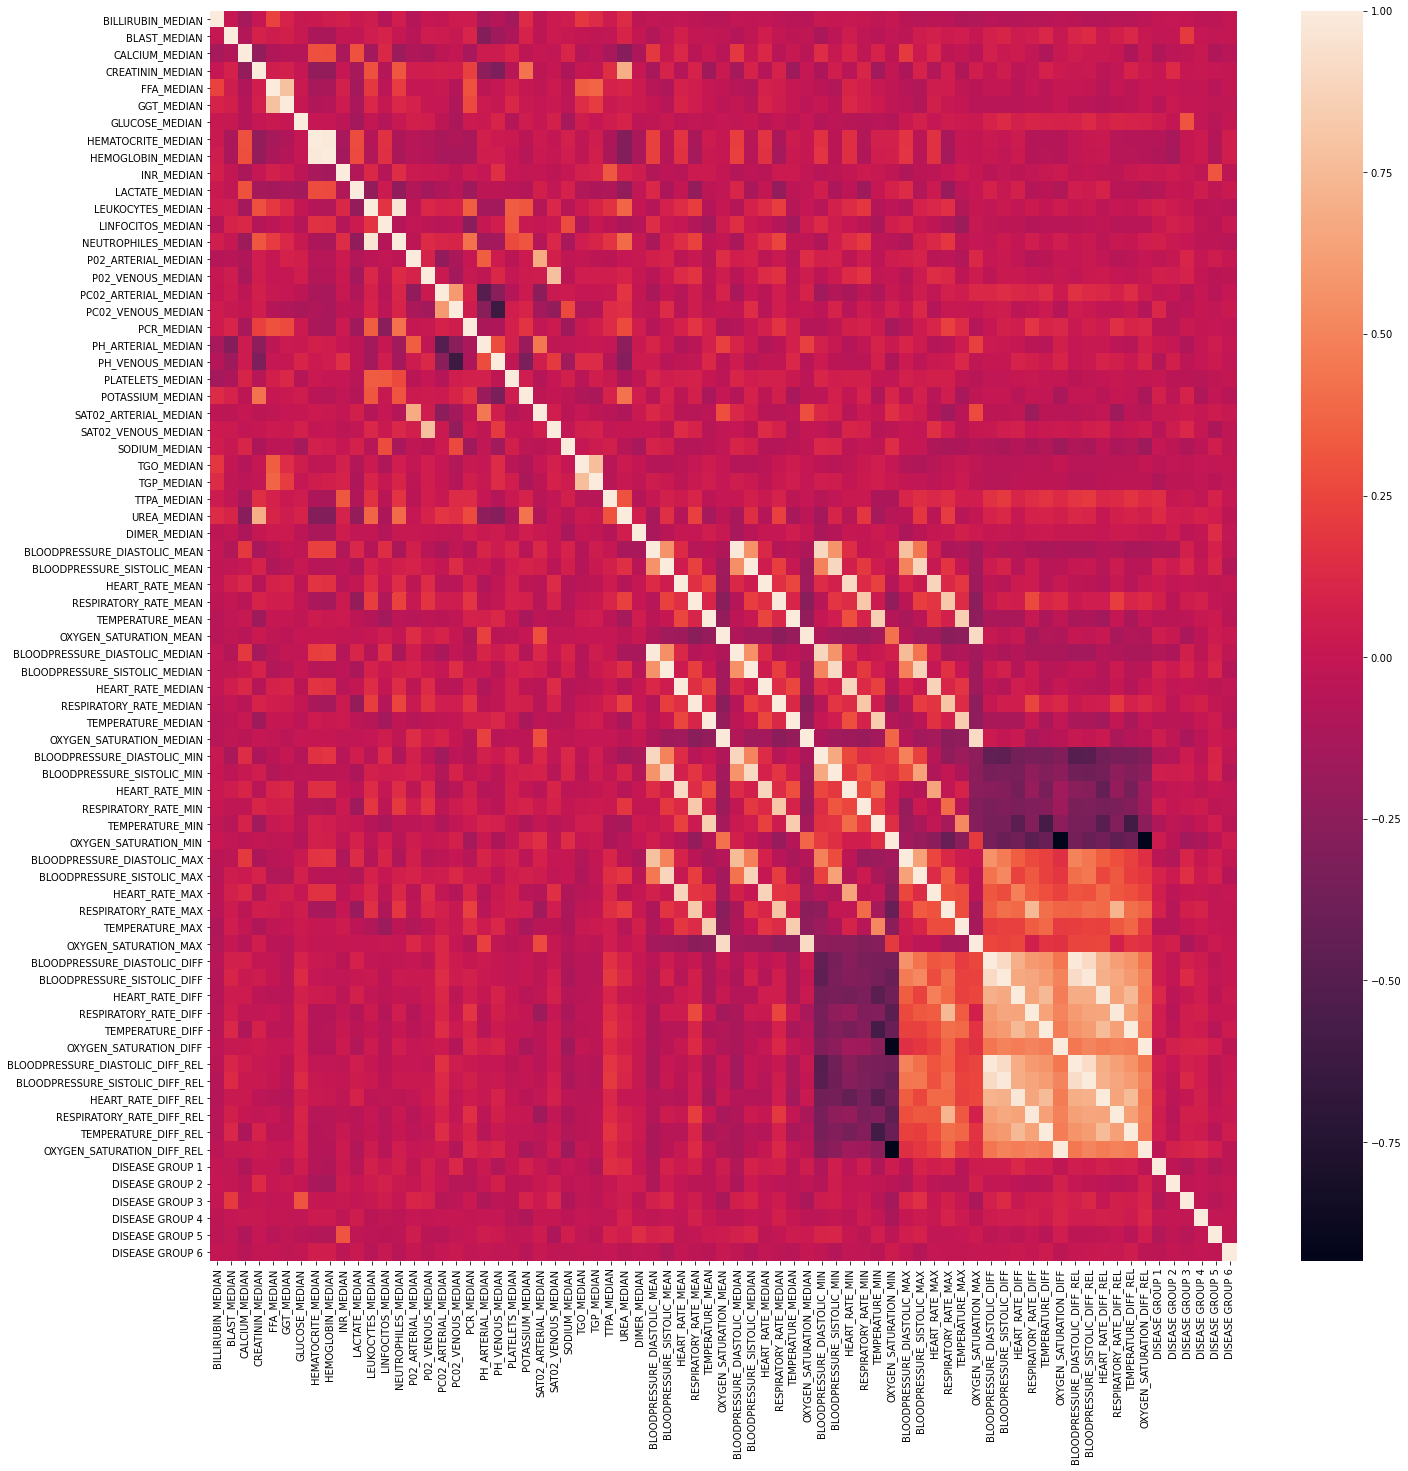

In [29]:
f,ax = plt.subplots(figsize=(23,23))
sns.heatmap(vital_signs_df.drop(columns=['ICU']).corr())
plt.show()

In [30]:
rows_list = []
for f in vital_signs:
    v1 = vital_signs_df[ vital_signs_df['ICU']==1 ][f].var()
    v0 = vital_signs_df[ vital_signs_df['ICU']==0 ][f].var()
    dict1 = {
        'feature' : f,
        'icu' : v1,
        'non-icu' : v0
    }
    rows_list.append(dict1)

var_vital_signs = pd.DataFrame(rows_list)

In [31]:
var_vital_signs

,feature,icu,non-icu
0,BILLIRUBIN_MEDIAN,0.006228,0.000533
1,BLAST_MEDIAN,0.020326,0.000000
2,CALCIUM_MEDIAN,0.013929,0.003506
3,CREATININ_MEDIAN,0.031953,0.000916
4,FFA_MEDIAN,0.030258,0.015622
5,GGT_MEDIAN,0.025451,0.008309
6,GLUCOSE_MEDIAN,0.015702,0.004372
7,HEMATOCRITE_MEDIAN,0.049031,0.038356
8,HEMOGLOBIN_MEDIAN,0.055083,0.041708
9,INR_MEDIAN,0.003633,0.001345


#### We can clearly see that the variance of vital signs for patients admitted in the icu varies drastically compared to that of the ones
#### not admitted to the ICU

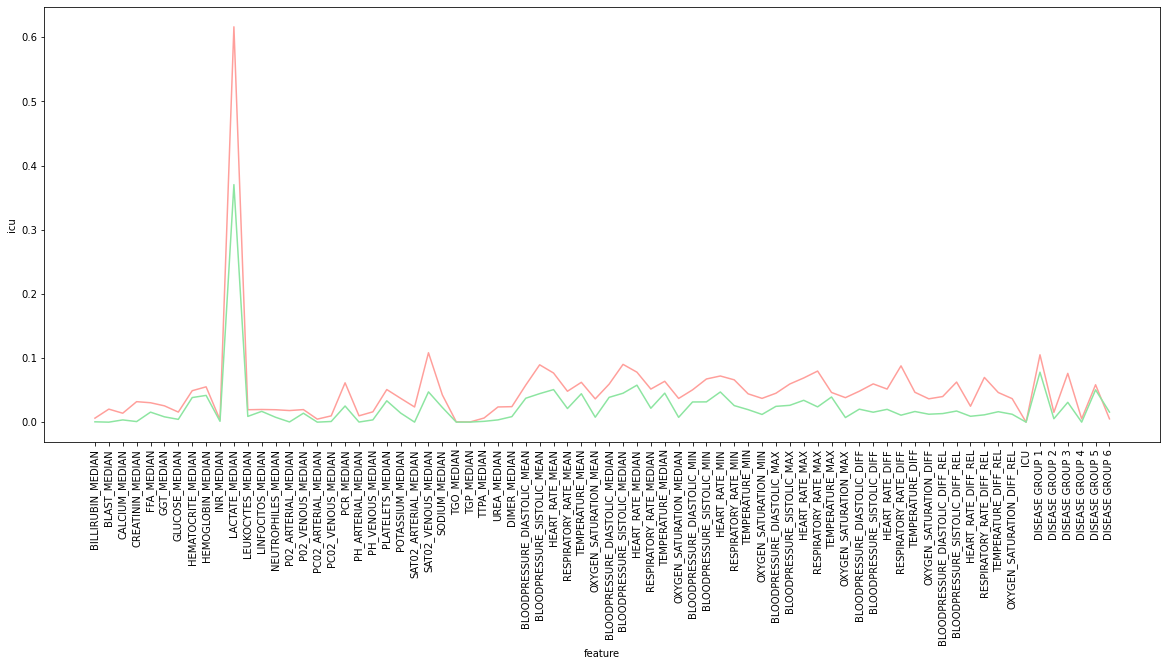

In [32]:
fig = plt.subplots(figsize=(20,8))
ax = sns.lineplot(data=var_vital_signs, x="feature", y="icu", color='r')
sns.lineplot(data=var_vital_signs, x="feature", y="non-icu", color='g')
plt.xticks(rotation=90)
plt.show()

#### From the kde plot we can see the spread (variance) of the red plot (ICU) is more than the green one.

<AxesSubplot:xlabel='GGT_MEDIAN', ylabel='Density'>

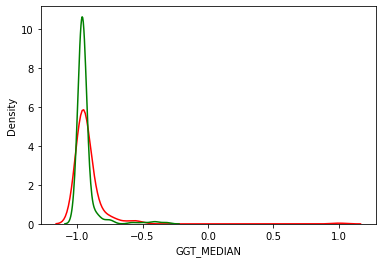

In [33]:
sns.kdeplot(final_data[ final_data['ICU']==1 ]['GGT_MEDIAN'],color = "red")
sns.kdeplot(final_data[ final_data['ICU']==0 ]['GGT_MEDIAN'],color = "green")

#### Check age percentile balance

<AxesSubplot:xlabel='AGE_PERCENTIL', ylabel='count'>

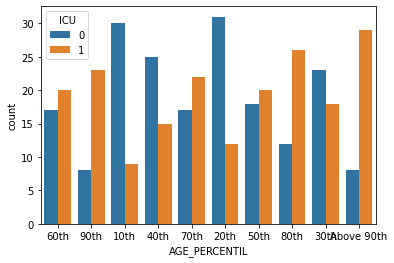

In [34]:
sns.countplot(x="AGE_PERCENTIL", hue="ICU", data=final_data)

#### Convert string percentile values to integers inorder to use this data for fitting a ML algorithm


In [35]:
def get_percentile(percentile_string):
    if (percentile_string =='Above 90th'):
        return 95
    else:
        return int(percentile_string[:-2])

final_data['AGE_PERCENTIL'] = final_data['AGE_PERCENTIL'].apply(lambda x : get_percentile(x))

#### We have a balanced dataset, because the number of entries/rows/patients admitted to ICU and the number of entries not admitte to ICU
#### is almost equal.
#### Thus no imbalance exists for the target variable.

<AxesSubplot:xlabel='ICU', ylabel='count'>

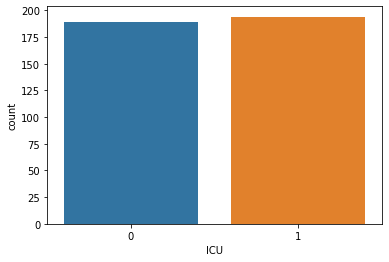

In [36]:
sns.countplot(x="ICU", data=final_data)

### Add 'index=False' to avoid the additional col 'Unnamed:0' which is added as an index while exporting the dataframe to csv

In [37]:
final_data.to_csv('Covid_ICU_preprocessed.csv', index=False)

## Normalizing and spliting data

In [38]:
X = final_data.drop(columns=['ICU'])
Y = final_data['ICU']
X = (X - X.mean())/X.std() 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)

In [39]:
print(x_train.shape)
#print(1)
print(y_train.shape)

(306, 86)
(306,)


### evaluating function

In [40]:
def evaluating_func(y, z):
    acc = accuracy_score(y, z)
    f1 = f1_score(y, z)
    prec = precision_score(y, z)
    rec = recall_score(y, z)
    f1_n = f1_score(1 - y, 1 - z)
    return {"accuracy":acc, "f1":f1, "precision":prec, "recall":rec, "f1_negative":f1_n}

# MODELS:

### 1- Multy layer perceptron model

In [68]:
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
clf_mlp = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv= 10)
clf_mlp.fit(x_train, y_train) # X is train samples and y is the corresponding labels

D:\software\installs\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=100, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={

In [69]:
mlp_scores = evaluating_func(y_test, clf_mlp.predict(x_test).astype(int))
print(mlp_scores)

{'accuracy': 0.8311688311688312, 'f1': 0.8, 'precision': 0.7428571428571429, 'recall': 0.8666666666666667, 'f1_negative': 0.853932584269663}


### 2- Random forest model

In [43]:
parameter_space = dict(
    criterion = ['gini', 'entropy']
)
clf_RandF = GridSearchCV(RandomForestClassifier(), parameter_space)
clf_RandF.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [44]:
randF_scores = evaluating_func(y_test, clf_RandF.predict(x_test).astype(int))
print(randF_scores)

{'accuracy': 0.8441558441558441, 'f1': 0.8125, 'precision': 0.7647058823529411, 'recall': 0.8666666666666667, 'f1_negative': 0.8666666666666666}


## 3- Ada boost

In [50]:
parameter_space = dict(
    learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 4],
    n_estimators = [10, 25, 50, 100, 200]
)
clf_ada = GridSearchCV(AdaBoostClassifier(), parameter_space)
clf_ada.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5, 1, 4],
                         'n_estimators': [10, 25, 50, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [51]:
adaB_scores = evaluating_func(y_test, clf_ada.predict(x_test).astype(int))
print(adaB_scores)

{'accuracy': 0.8701298701298701, 'f1': 0.8387096774193549, 'precision': 0.8125, 'recall': 0.8666666666666667, 'f1_negative': 0.891304347826087}


### 4- Linear regression

#### we did Linear regression in "R" and made a "R-Markdown" file which is available in directories, and in here we just use the scores which are derive from Linear Regression model

In [58]:
linearReg_scores = {'accuracy':  0.8876404, 'f1':  0.8863636 , 'precision': 0.8125, 'recall': 0.975, 'f1_negative': 0.9375}
print(linearReg_scores)

{'accuracy': 0.8876404, 'f1': 0.8863636, 'precision': 0.8125, 'recall': 0.975, 'f1_negative': 0.9375}


# Result on test data

In [72]:
listOfScores = {"MLP": mlp_scores.values(), "Random_for":randF_scores.values(), "ada_boost": adaB_scores.values(), "linear_reg":linearReg_scores.values()}
scores_table = pd.DataFrame(listOfScores, index=['accuracy', 'f1', 'precision', 'recall', 'f1_negative'])
scores_table

,MLP,Random_for,ada_boost,linear_reg
accuracy,0.831169,0.844156,0.870130,0.887640
f1,0.800000,0.812500,0.838710,0.886364
precision,0.742857,0.764706,0.812500,0.812500
recall,0.866667,0.866667,0.866667,0.975000
f1_negative,0.853933,0.866667,0.891304,0.937500
